# Artificial Intelligence Engineer Nanodegree - Probabilistic Models
## Project: Sign Language Recognition System
- [Introduction](#intro)
- [Part 1 Feature Selection](#part1_tutorial)
    - [Tutorial](#part1_tutorial)
    - [Features Submission](#part1_submission)
    - [Features Unittest](#part1_test)
- [Part 2 Train the models](#part2_tutorial)
    - [Tutorial](#part2_tutorial)
    - [Model Selection Score Submission](#part2_submission)
    - [Model Score Unittest](#part2_test)
- [Part 3 Build a Recognizer](#part3_tutorial)
    - [Tutorial](#part3_tutorial)
    - [Recognizer Submission](#part3_submission)
    - [Recognizer Unittest](#part3_test)
- [Part 4 (OPTIONAL) Improve the WER with Language Models](#part4_info)

<a id='intro'></a>
## Introduction
The overall goal of this project is to build a word recognizer for American Sign Language video sequences, demonstrating the power of probabalistic models.  In particular, this project employs  [hidden Markov models (HMM's)](https://en.wikipedia.org/wiki/Hidden_Markov_model) to analyze a series of measurements taken from videos of American Sign Language (ASL) collected for research (see the [RWTH-BOSTON-104 Database](http://www-i6.informatik.rwth-aachen.de/~dreuw/database-rwth-boston-104.php)).  In this video, the right-hand x and y locations are plotted as the speaker signs the sentence.
[![ASLR demo](http://www-i6.informatik.rwth-aachen.de/~dreuw/images/demosample.png)](https://drive.google.com/open?id=0B_5qGuFe-wbhUXRuVnNZVnMtam8)

The raw data, train, and test sets are pre-defined.  You will derive a variety of feature sets (explored in Part 1), as well as implement three different model selection criterion to determine the optimal number of hidden states for each word model (explored in Part 2). Finally, in Part 3 you will implement the recognizer and compare the effects the different combinations of feature sets and model selection criteria.  

At the end of each Part, complete the submission cells with implementations, answer all questions, and pass the unit tests.  Then submit the completed notebook for review!

<a id='part1_tutorial'></a>
## PART 1: Data

### Features Tutorial
##### Load the initial database
A data handler designed for this database is provided in the student codebase as the `AslDb` class in the `asl_data` module.  This handler creates the initial [pandas](http://pandas.pydata.org/pandas-docs/stable/) dataframe from the corpus of data included in the `data` directory as well as dictionaries suitable for extracting data in a format friendly to the [hmmlearn](https://hmmlearn.readthedocs.io/en/latest/) library.  We'll use those to create models in Part 2.

To start, let's set up the initial database and select an example set of features for the training set.  At the end of Part 1, you will create additional feature sets for experimentation. 

In [1]:
import numpy as np
import pandas as pd
from asl_data import AslDb


asl = AslDb() # initializes the database
asl.df.head(10) # displays the first (ten) rows of the asl database, indexed by video and frame

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker
video frame                                                           
98    0         149     181      170      175     161      62  woman-1
      1         149     181      170      175     161      62  woman-1
      2         149     181      170      175     161      62  woman-1
      3         149     181      170      175     161      62  woman-1
      4         149     181      170      175     161      62  woman-1
      5         149     181      170      175     161      62  woman-1
      6         149     181      170      175     161      62  woman-1
      7         149     181      170      175     161      62  woman-1
      8         149     181      170      175     161      62  woman-1
      9         149     181      170      175     161      62  woman-1

In [2]:
asl.df.ix[98,1]  # look at the data available for an individual frame

C:\Users\user\Anaconda3\envs\aind\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


left-x         149
left-y         181
right-x        170
right-y        175
nose-x         161
nose-y          62
speaker    woman-1
Name: (98, 1), dtype: object

The frame represented by video 98, frame 1 is shown here:
![Video 98](http://www-i6.informatik.rwth-aachen.de/~dreuw/database/rwth-boston-104/overview/images/orig/098-start.jpg)

##### Feature selection for training the model
The objective of feature selection when training a model is to choose the most relevant variables while keeping the model as simple as possible, thus reducing training time.  We can use the raw features already provided or derive our own and add columns to the pandas dataframe `asl.df` for selection. As an example, in the next cell a feature named `'grnd-ry'` is added. This feature is the difference between the right-hand y value and the nose y value, which serves as the "ground" right y value. 

In [3]:
asl.df['grnd-ry'] = asl.df['right-y'] - asl.df['nose-y']
asl.df.head(10)  # the new feature 'grnd-ry' is now in the frames dictionary

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   
      5         149     181      170      175     161      62  woman-1   
      6         149     181      170      175     161      62  woman-1   
      7         149     181      170      175     161      62  woman-1   
      8         149     181      170      175     161      62  woman-1   
      9         149     181      170      175     161      62  woman-1   

             grnd-ry  
video frame           
98    0          113  
      1          113  
      2          113  
      3          113  
      4          113  
      5          113  
      6          113  
      7          113  
      8          113  
      9          113

##### Try it!

In [4]:
from asl_utils import test_features_tryit
# TODO add df columns for 'grnd-rx', 'grnd-ly', 'grnd-lx' representing differences between hand and nose locations
asl.df['grnd-rx'] = asl.df['right-x'] - asl.df['nose-x']
asl.df['grnd-ly'] = asl.df['left-y'] - asl.df['nose-y']
asl.df['grnd-lx'] = asl.df['left-x'] - asl.df['nose-x']

# test the code
test_features_tryit(asl)

asl.df sample


left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly  grnd-lx  
video frame                                      
98    0          113        9      119      -12  
      1          113        9      119      -12  
      2          113        9      119      -12  
      3          113        9      119      -12  
      4          113        9      119      -12

In [5]:
# collect the features into a list
features_ground = ['grnd-rx','grnd-ry','grnd-lx','grnd-ly']
 #show a single set of features for a given (video, frame) tuple
[asl.df.ix[98,1][v] for v in features_ground]

[9, 113, -12, 119]

##### Build the training set
Now that we have a feature list defined, we can pass that list to the `build_training` method to collect the features for all the words in the training set.  Each word in the training set has multiple examples from various videos.  Below we can see the unique words that have been loaded into the training set:

In [6]:
training = asl.build_training(features_ground)
print("Training words: {}".format(training.words))

Training words: ['TEACHER', 'CORN1', 'IX-1P', 'LEAVE', 'CANDY', 'SEARCH-FOR', 'KNOW', 'PAST', 'HOUSE', 'HERE', 'LAST-WEEK', 'SHOOT', 'GO1', 'WRITE', 'VIDEOTAPE', 'WHAT', 'YESTERDAY', 'WHO', 'APPLE', 'MARY', 'EAT', 'BLAME', 'FUTURE', 'ALL', 'FRIEND', 'GET', 'SHOULD', 'CAR', 'CORN', 'JOHN', 'SELF', 'HAVE', 'COAT', 'GIRL', 'NEW-YORK', 'PUTASIDE', 'LEG', 'OLD', 'POSS', 'HIT', 'VISIT', 'FIND', 'SAY-1P', 'GO', 'SUE', 'BROCCOLI', 'BOY', 'THROW', 'ARRIVE', 'CHINA', 'BORROW', 'THINK', 'TOY', 'NEXT-WEEK', 'READ', 'TELL', 'BREAK-DOWN', 'JANA', 'CHICAGO', 'ANN', 'BLUE', 'GO2', 'GROUP', 'MOVIE', 'WONT', 'BROTHER', 'WOMAN', 'NOT', 'BOX', 'MOTHER', 'GIVE1', 'LOVE', 'SOMETHING-ONE', 'PREFER', 'WILL', 'BUY1', 'CAN', 'GIVE3', 'VEGETABLE', 'BOOK', 'STUDENT', 'FRANK', 'POTATO', 'SEE', 'MAN', 'SAY', 'CHICKEN', 'BUY', 'FINISH', 'STOLEN', 'HOMEWORK', 'FRED', 'DECIDE', 'BUT', 'TOY1', 'BILL', 'FUTURE1', 'FISH', 'IX', 'PARTY', 'CHOCOLATE', 'LIKE', 'MANY', 'GIVE2', 'TOMORROW', 'NAME', 'GIVE', 'NEW', 'SELL', 'PEO

The training data in `training` is an object of class `WordsData` defined in the `asl_data` module.  in addition to the `words` list, data can be accessed with the `get_all_sequences`, `get_all_Xlengths`, `get_word_sequences`, and `get_word_Xlengths` methods. We need the `get_word_Xlengths` method to train multiple sequences with the `hmmlearn` library.  In the following example, notice that there are two lists; the first is a concatenation of all the sequences(the X portion) and the second is a list of the sequence lengths(the Lengths portion).

In [7]:
training.get_word_Xlengths('STUDENT')

(array([[-24,  18,   9,  65],
        [-19,  21,   9,  55],
        [-13,  26,  13,  49],
        [-19,  25,  14,  42],
        [-20,  22,  15,  37],
        [-29,  23,  20,  37],
        [-42,  29,  21,  39],
        [-41,  36,  25,  43],
        [-13,  62,  30, 115],
        [-10,  72,  26, 108],
        [-10,  82,  26, 102],
        [-10,  82,  28,  99],
        [ -9,  81,  28,  98],
        [ -9,  81,  29, 103],
        [-10,  84,  30, 112],
        [-12,  92,  31, 122],
        [-17,  98,  30, 137],
        [-11,  63,   4,  92],
        [-12,  55,   9,  79],
        [-12,  55,  11,  71],
        [-13,  45,  11,  64],
        [-17,  45,  11,  62],
        [-18,  40,  15,  56],
        [-21,  36,  23,  53],
        [-23,  37,  30,  54],
        [-26,  40,  34,  58],
        [-28,  50,  39,  67]], dtype=int64), [8, 9, 10])

###### More feature sets
So far we have a simple feature set that is enough to get started modeling.  However, we might get better results if we manipulate the raw values a bit more, so we will go ahead and set up some other options now for experimentation later.  For example, we could normalize each speaker's range of motion with grouped statistics using [Pandas stats](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats) functions and [pandas groupby](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).  Below is an example for finding the means of all speaker subgroups.

In [8]:
df_means = asl.df.groupby('speaker').mean()
df_means

,left-x,left-y,right-x,right-y,nose-x,nose-y,grnd-ry,grnd-rx,grnd-ly,grnd-lx
speaker,,,,,,,,,,
man-1,206.248203,218.679449,155.464350,150.371031,175.031756,61.642600,88.728430,-19.567406,157.036848,31.216447
woman-1,164.661438,161.271242,151.017865,117.332462,162.655120,57.245098,60.087364,-11.637255,104.026144,2.006318
woman-2,183.214509,176.527232,156.866295,119.835714,170.318973,58.022098,61.813616,-13.452679,118.505134,12.895536


To select a mean that matches by speaker, use the pandas [map](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) method:

In [9]:
asl.df['left-x-mean']= asl.df['speaker'].map(df_means['left-x'])
asl.df.head()

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly  grnd-lx  left-x-mean  
video frame                                                   
98    0          113        9      119      -12   164.661438  
      1          113        9      119      -12   164.661438  
      2          113        9      119      -12   164.661438  
      3          113        9      119      -12   164.661438  
      4          113        9      119      -12   164.661438

##### Try it!

In [10]:
from asl_utils import test_std_tryit
# TODO Create a dataframe named `df_std` with standard deviations grouped by speaker
df_std = asl.df.groupby('speaker').std()

# test the code
test_std_tryit(df_std)

df_std


,left-x,left-y,right-x,right-y,nose-x,nose-y,grnd-ry,grnd-rx,grnd-ly,grnd-lx,left-x-mean
speaker,,,,,,,,,,,
man-1,15.154425,36.328485,18.901917,54.902340,6.654573,5.520045,53.487999,20.269032,36.572749,15.080360,0.0
woman-1,17.573442,26.594521,16.459943,34.667787,3.549392,3.538330,33.972660,16.764706,27.117393,17.328941,0.0
woman-2,15.388711,28.825025,14.890288,39.649111,4.099760,3.416167,39.128572,16.191324,29.320655,15.050938,0.0


<a id='part1_submission'></a>
### Features Implementation Submission
Implement four feature sets and answer the question that follows.
- normalized Cartesian coordinates
    - use *mean* and *standard deviation* statistics and the [standard score](https://en.wikipedia.org/wiki/Standard_score) equation to account for speakers with different heights and arm length
    
- polar coordinates
    - calculate polar coordinates with [Cartesian to polar equations](https://en.wikipedia.org/wiki/Polar_coordinate_system#Converting_between_polar_and_Cartesian_coordinates)
    - use the [np.arctan2](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.arctan2.html) function and *swap the x and y axes* to move the $0$ to $2\pi$ discontinuity to 12 o'clock instead of 3 o'clock;  in other words, the normal break in radians value from $0$ to $2\pi$ occurs directly to the left of the speaker's nose, which may be in the signing area and interfere with results.  By swapping the x and y axes, that discontinuity move to directly above the speaker's head, an area not generally used in signing.

- delta difference
    - as described in Thad's lecture, use the difference in values between one frame and the next frames as features
    - pandas [diff method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html) and [fillna method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) will be helpful for this one

- custom features
    - These are your own design; combine techniques used above or come up with something else entirely. We look forward to seeing what you come up with! 
    Some ideas to get you started:
        - normalize using a [feature scaling equation](https://en.wikipedia.org/wiki/Feature_scaling)
        - normalize the polar coordinates
        - adding additional deltas


In [11]:
# Mean for right, left, x and y 
asl.df['right-x-mean'] = asl.df['speaker'].map(df_means['right-x'])
asl.df['left-x-mean'] = asl.df['speaker'].map(df_means['left-x'])
asl.df['right-y-mean'] = asl.df['speaker'].map(df_means['right-y'])
asl.df['left-y-mean'] = asl.df['speaker'].map(df_means['left-y'])

# Standard deviation for right, left, x and y 
asl.df['right-x-std'] = asl.df['speaker'].map(df_std['right-x'])
asl.df['left-x-std'] = asl.df['speaker'].map(df_std['left-x'])
asl.df['right-y-std'] = asl.df['speaker'].map(df_std['right-y'])
asl.df['left-y-std'] = asl.df['speaker'].map(df_std['left-y'])

# Normalization with Z-score scaling 
asl.df['norm-rx'] = (asl.df['right-x'] - asl.df['right-x-mean'])/asl.df['right-x-std']
asl.df['norm-ry'] = (asl.df['right-y'] - asl.df['right-y-mean'])/asl.df['right-y-std']
asl.df['norm-lx'] = (asl.df['left-x'] - asl.df['left-x-mean'])/asl.df['left-x-std']
asl.df['norm-ly'] = (asl.df['left-y'] - asl.df['left-y-mean'])/asl.df['left-y-std']

features_norm = ['norm-rx', 'norm-ry', 'norm-lx','norm-ly']
asl.df.head(10)

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   
      5         149     181      170      175     161      62  woman-1   
      6         149     181      170      175     161      62  woman-1   
      7         149     181      170      175     161      62  woman-1   
      8         149     181      170      175     161      62  woman-1   
      9         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly    ...     right-y-mean  left-y-mean  \
video frame                               ...                                 
98    0          113        9      119    ...       117.332462   161.271242   
      1          113        9      119    ...       117.332462   161.271242   
      2          113        9      119    ...       117.332462   161.271242   
      3          113        9      119    ...       117.332462   161.271242   
      4          113        9      119    ...       117.332462   161.271242   
      5          113        9      119    ...       117.332462   161.271242   
      6          113        9      119    ...       117.332462   161.271242   
      7          113        9      119    ...       117.332462   161.271242   
      8          113        9      119    ...       117.332462   161.271242   
      9          113        9      119    ...       117.332462   161.271242   

             right-x-std  left-x-std  right-y-std  left-y-std   norm-rx  \
video frame                                                               
98    0        16.459943   17.573442    34.667787   26.594521  1.153232   
      1        16.459943   17.573442    34.667787   26.594521  1.153232   
      2        16.459943   17.573442    34.667787   26.594521  1.153232   
      3        16.459943   17.573442    34.667787   26.594521  1.153232   
      4        16.459943   17.573442    34.667787   26.594521  1.153232   
      5        16.459943   17.573442    34.667787   26.594521  1.153232   
      6        16.459943   17.573442    34.667787   26.594521  1.153232   
      7        16.459943   17.573442    34.667787   26.594521  1.153232   
      8        16.459943   17.573442    34.667787   26.594521  1.153232   
      9        16.459943   17.573442    34.667787   26.594521  1.153232   

              norm-ry   norm-lx   norm-ly  
video frame                                
98    0      1.663433 -0.891199  0.741835  
      1      1.663433 -0.891199  0.741835  
      2      1.663433 -0.891199  0.741835  
      3      1.663433 -0.891199  0.741835  
      4      1.663433 -0.891199  0.741835  
      5      1.663433 -0.891199  0.741835  
      6      1.663433 -0.891199  0.741835  
      7      1.663433 -0.891199  0.741835  
      8      1.663433 -0.891199  0.741835  
      9      1.663433 -0.891199  0.741835  

[10 rows x 23 columns]

In [12]:
# Caclulate the polar coordinate
asl.df['polar-rr'] = np.sqrt(np.square(asl.df['grnd-rx']) + np.square(asl.df['grnd-ry']))
asl.df['polar-rtheta'] = np.arctan2(asl.df['grnd-rx'], asl.df['grnd-ry']) # Exchange the x,y positioin 
asl.df['polar-lr'] = np.sqrt(np.square(asl.df['grnd-lx']) + np.square(asl.df['grnd-ly']))
asl.df['polar-ltheta'] = np.arctan2(asl.df['grnd-lx'], asl.df['grnd-ly'])

features_polar = ['polar-rr', 'polar-rtheta', 'polar-lr', 'polar-ltheta']
asl.df.head(10)

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   
      5         149     181      170      175     161      62  woman-1   
      6         149     181      170      175     161      62  woman-1   
      7         149     181      170      175     161      62  woman-1   
      8         149     181      170      175     161      62  woman-1   
      9         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly      ...       right-y-std  left-y-std  \
video frame                                 ...                                 
98    0          113        9      119      ...         34.667787   26.594521   
      1          113        9      119      ...         34.667787   26.594521   
      2          113        9      119      ...         34.667787   26.594521   
      3          113        9      119      ...         34.667787   26.594521   
      4          113        9      119      ...         34.667787   26.594521   
      5          113        9      119      ...         34.667787   26.594521   
      6          113        9      119      ...         34.667787   26.594521   
      7          113        9      119      ...         34.667787   26.594521   
      8          113        9      119      ...         34.667787   26.594521   
      9          113        9      119      ...         34.667787   26.594521   

              norm-rx   norm-ry   norm-lx   norm-ly   polar-rr  polar-rtheta  \
video frame                                                                    
98    0      1.153232  1.663433 -0.891199  0.741835  113.35784      0.079478   
      1      1.153232  1.663433 -0.891199  0.741835  113.35784      0.079478   
      2      1.153232  1.663433 -0.891199  0.741835  113.35784      0.079478   
      3      1.153232  1.663433 -0.891199  0.741835  113.35784      0.079478   
      4      1.153232  1.663433 -0.891199  0.741835  113.35784      0.079478   
      5      1.153232  1.663433 -0.891199  0.741835  113.35784      0.079478   
      6      1.153232  1.663433 -0.891199  0.741835  113.35784      0.079478   
      7      1.153232  1.663433 -0.891199  0.741835  113.35784      0.079478   
      8      1.153232  1.663433 -0.891199  0.741835  113.35784      0.079478   
      9      1.153232  1.663433 -0.891199  0.741835  113.35784      0.079478   

               polar-lr  polar-ltheta  
video frame                            
98    0      119.603512     -0.100501  
      1      119.603512     -0.100501  
      2      119.603512     -0.100501  
      3      119.603512     -0.100501  
      4      119.603512     -0.100501  
      5      119.603512     -0.100501  
      6      119.603512     -0.100501  
      7      119.603512     -0.100501  
      8      119.603512     -0.100501  
      9      119.603512     -0.100501  

[10 rows x 27 columns]

In [13]:
# Calcualte Deltas 

asl.df['delta-rx'] = asl.df['right-x'].diff().fillna(0)
asl.df['delta-ry'] = asl.df['right-y'].diff().fillna(0)
asl.df['delta-lx'] = asl.df['left-x'].diff().fillna(0)
asl.df['delta-ly'] = asl.df['left-y'].diff().fillna(0)

features_delta = ['delta-rx', 'delta-ry', 'delta-lx', 'delta-ly']
asl.df.head(10)

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   
      5         149     181      170      175     161      62  woman-1   
      6         149     181      170      175     161      62  woman-1   
      7         149     181      170      175     161      62  woman-1   
      8         149     181      170      175     161      62  woman-1   
      9         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly    ...      norm-lx   norm-ly  \
video frame                               ...                          
98    0          113        9      119    ...    -0.891199  0.741835   
      1          113        9      119    ...    -0.891199  0.741835   
      2          113        9      119    ...    -0.891199  0.741835   
      3          113        9      119    ...    -0.891199  0.741835   
      4          113        9      119    ...    -0.891199  0.741835   
      5          113        9      119    ...    -0.891199  0.741835   
      6          113        9      119    ...    -0.891199  0.741835   
      7          113        9      119    ...    -0.891199  0.741835   
      8          113        9      119    ...    -0.891199  0.741835   
      9          113        9      119    ...    -0.891199  0.741835   

              polar-rr  polar-rtheta    polar-lr  polar-ltheta  delta-rx  \
video frame                                                                
98    0      113.35784      0.079478  119.603512     -0.100501       0.0   
      1      113.35784      0.079478  119.603512     -0.100501       0.0   
      2      113.35784      0.079478  119.603512     -0.100501       0.0   
      3      113.35784      0.079478  119.603512     -0.100501       0.0   
      4      113.35784      0.079478  119.603512     -0.100501       0.0   
      5      113.35784      0.079478  119.603512     -0.100501       0.0   
      6      113.35784      0.079478  119.603512     -0.100501       0.0   
      7      113.35784      0.079478  119.603512     -0.100501       0.0   
      8      113.35784      0.079478  119.603512     -0.100501       0.0   
      9      113.35784      0.079478  119.603512     -0.100501       0.0   

             delta-ry  delta-lx  delta-ly  
video frame                                
98    0           0.0       0.0       0.0  
      1           0.0       0.0       0.0  
      2           0.0       0.0       0.0  
      3           0.0       0.0       0.0  
      4           0.0       0.0       0.0  
      5           0.0       0.0       0.0  
      6           0.0       0.0       0.0  
      7           0.0       0.0       0.0  
      8           0.0       0.0       0.0  
      9           0.0       0.0       0.0  

[10 rows x 31 columns]

In [14]:
# Custom features : Polar coordinate normalization

df_means = asl.df.groupby('speaker').mean()
df_std = asl.df.groupby('speaker').std()

# Mean for polar coordinate
asl.df['polar-rr-mean'] = asl.df['speaker'].map(df_means['polar-rr'])
asl.df['polar-rtheta-mean'] = asl.df['speaker'].map(df_means['polar-rtheta'])
asl.df['polar-lr-mean'] = asl.df['speaker'].map(df_means['polar-lr'])
asl.df['polar-ltheta-mean'] = asl.df['speaker'].map(df_means['polar-ltheta'])

# Standard deviation for polar coordinate
asl.df['polar-rr-std'] = asl.df['speaker'].map(df_std['polar-rr'])
asl.df['polar-rtheta-std'] = asl.df['speaker'].map(df_std['polar-rtheta'])
asl.df['polar-lr-std'] = asl.df['speaker'].map(df_std['polar-lr'])
asl.df['polar-ltheta-std'] = asl.df['speaker'].map(df_std['polar-ltheta'])

# Normalization with Z-score scaling 
asl.df['norm-polar-rr'] = (asl.df['polar-rr'] - asl.df['polar-rr-mean'])/asl.df['polar-rr-std']
asl.df['norm-polar-rtheta'] = (asl.df['polar-rtheta'] - asl.df['polar-rtheta-mean'])/asl.df['polar-rtheta-std']
asl.df['norm-polar-lr'] = (asl.df['polar-lr'] - asl.df['polar-lr-mean'])/asl.df['polar-lr-std']
asl.df['norm-polar-ltheta'] = (asl.df['polar-ltheta'] - asl.df['polar-ltheta-mean'])/asl.df['polar-ltheta-std']

features_custom = ['norm-polar-rr', 'norm-polar-rtheta', 'norm-polar-lr','norm-polar-ltheta']
asl.df.head(10)

left-x  left-y  right-x  right-y  nose-x  nose-y  speaker  \
video frame                                                              
98    0         149     181      170      175     161      62  woman-1   
      1         149     181      170      175     161      62  woman-1   
      2         149     181      170      175     161      62  woman-1   
      3         149     181      170      175     161      62  woman-1   
      4         149     181      170      175     161      62  woman-1   
      5         149     181      170      175     161      62  woman-1   
      6         149     181      170      175     161      62  woman-1   
      7         149     181      170      175     161      62  woman-1   
      8         149     181      170      175     161      62  woman-1   
      9         149     181      170      175     161      62  woman-1   

             grnd-ry  grnd-rx  grnd-ly        ...          polar-lr-mean  \
video frame                                   ...                          
98    0          113        9      119        ...             105.968447   
      1          113        9      119        ...             105.968447   
      2          113        9      119        ...             105.968447   
      3          113        9      119        ...             105.968447   
      4          113        9      119        ...             105.968447   
      5          113        9      119        ...             105.968447   
      6          113        9      119        ...             105.968447   
      7          113        9      119        ...             105.968447   
      8          113        9      119        ...             105.968447   
      9          113        9      119        ...             105.968447   

             polar-ltheta-mean  polar-rr-std  polar-rtheta-std  polar-lr-std  \
video frame                                                                    
98    0               0.060601     30.654063          0.397837     25.133829   
      1               0.060601     30.654063          0.397837     25.133829   
      2               0.060601     30.654063          0.397837     25.133829   
      3               0.060601     30.654063          0.397837     25.133829   
      4               0.060601     30.654063          0.397837     25.133829   
      5               0.060601     30.654063          0.397837     25.133829   
      6               0.060601     30.654063          0.397837     25.133829   
      7               0.060601     30.654063          0.397837     25.133829   
      8               0.060601     30.654063          0.397837     25.133829   
      9               0.060601     30.654063          0.397837     25.133829   

             polar-ltheta-std  norm-polar-rr  norm-polar-rtheta  \
video frame                                                       
98    0              0.219121       1.573439           0.959419   
      1              0.219121       1.573439           0.959419   
      2              0.219121       1.573439           0.959419   
      3              0.219121       1.573439           0.959419   
      4              0.219121       1.573439           0.959419   
      5              0.219121       1.573439           0.959419   
      6              0.219121       1.573439           0.959419   
      7              0.219121       1.573439           0.959419   
      8              0.219121       1.573439           0.959419   
      9              0.219121       1.573439           0.959419   

             norm-polar-lr  norm-polar-ltheta  
video frame                                    
98    0           0.542499          -0.735219  
      1           0.542499          -0.735219  
      2           0.542499          -0.735219  
      3           0.542499          -0.735219  
      4           0.542499          -0.735219  
      5           0.542499          -0.735219  
      6           0.542499          -0.735219  
      7      

**Question 1:**  What custom features did you choose for the features_custom set and why?

**Answer 1:** _I chose the "polar coordinate normalization" as my custom feature. Normalization is very important to remove the bias from the original data. "ground-coordinate" data is derived from the difference between nose and hand location. Therefore, this data might have bias because it could be fluctuated based on the personal body condition. Since the polar coordinate is calculated basically based on the "ground-coordinate" data, it should be normalized in order to remove data bias._ 

<a id='part1_test'></a>
### Features Unit Testing
Run the following unit tests as a sanity check on the defined "ground", "norm", "polar", and 'delta"
feature sets.  The test simply looks for some valid values but is not exhaustive.  However, the project should not be submitted if these tests don't pass.

In [15]:
import unittest

class TestFeatures(unittest.TestCase):

    def test_features_ground(self):
        sample = (asl.df.ix[98, 1][features_ground]).tolist()
        self.assertEqual(sample, [9, 113, -12, 119])

    def test_features_norm(self):
        sample = (asl.df.ix[98, 1][features_norm]).tolist()
        np.testing.assert_almost_equal(sample, [ 1.153,  1.663, -0.891,  0.742], 3)

    def test_features_polar(self):
        sample = (asl.df.ix[98,1][features_polar]).tolist()
        np.testing.assert_almost_equal(sample, [113.3578, 0.0794, 119.603, -0.1005], 3)

    def test_features_delta(self):
        sample = (asl.df.ix[98, 0][features_delta]).tolist()
        self.assertEqual(sample, [0, 0, 0, 0])
        sample = (asl.df.ix[98, 18][features_delta]).tolist()
        self.assertTrue(sample in [[-16, -5, -2, 4], [-14, -9, 0, 0]], "Sample value found was {}".format(sample))
                         
suite = unittest.TestLoader().loadTestsFromModule(TestFeatures())
unittest.TextTestRunner().run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 0.015s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

<a id='part2_tutorial'></a>
## PART 2: Model Selection
### Model Selection Tutorial
The objective of Model Selection is to tune the number of states for each word HMM prior to testing on unseen data.  In this section you will explore three methods: 
- Log likelihood using cross-validation folds (CV)
- Bayesian Information Criterion (BIC)
- Discriminative Information Criterion (DIC) 

##### Train a single word
Now that we have built a training set with sequence data, we can "train" models for each word.  As a simple starting example, we train a single word using Gaussian hidden Markov models (HMM).   By using the `fit` method during training, the [Baum-Welch Expectation-Maximization](https://en.wikipedia.org/wiki/Baum%E2%80%93Welch_algorithm) (EM) algorithm is invoked iteratively to find the best estimate for the model *for the number of hidden states specified* from a group of sample seequences. For this example, we *assume* the correct number of hidden states is 3, but that is just a guess.  How do we know what the "best" number of states for training is?  We will need to find some model selection technique to choose the best parameter.

In [16]:
import warnings
from hmmlearn.hmm import GaussianHMM

def train_a_word(word, num_hidden_states, features):
    
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    training = asl.build_training(features)  
    X, lengths = training.get_word_Xlengths(word)
    model = GaussianHMM(n_components=num_hidden_states, n_iter=1000).fit(X, lengths)
    logL = model.score(X, lengths)
    return model, logL

demoword = 'BOOK'
model, logL = train_a_word(demoword, 3, features_ground)
print("Number of states trained in model for {} is {}".format(demoword, model.n_components))
print("logL = {}".format(logL))

Number of states trained in model for BOOK is 3
logL = -2331.113812743319


The HMM model has been trained and information can be pulled from the model, including means and variances for each feature and hidden state.  The [log likelihood](http://math.stackexchange.com/questions/892832/why-we-consider-log-likelihood-instead-of-likelihood-in-gaussian-distribution) for any individual sample or group of samples can also be calculated with the `score` method.

In [17]:
def show_model_stats(word, model):
    print("Number of states trained in model for {} is {}".format(word, model.n_components))    
    variance=np.array([np.diag(model.covars_[i]) for i in range(model.n_components)])    
    for i in range(model.n_components):  # for each hidden state
        print("hidden state #{}".format(i))
        print("mean = ", model.means_[i])
        print("variance = ", variance[i])
        print()
    
show_model_stats(demoword, model)

Number of states trained in model for BOOK is 3
hidden state #0
mean =  [-11.45300909  94.109178    19.03512475 102.2030162 ]
variance =  [ 77.403668   203.35441965  26.68898447 156.12444034]

hidden state #1
mean =  [-3.46504869 50.66686933 14.02391587 52.04731066]
variance =  [49.12346305 43.04799144 39.35109609 47.24195772]

hidden state #2
mean =  [-1.12415027 69.44164191 17.02866283 77.7231196 ]
variance =  [19.70434594 16.83041492 30.51552305 11.03678246]



##### Try it!
Experiment by changing the feature set, word, and/or num_hidden_states values in the next cell to see changes in values.  

In [18]:
my_testword = 'CHOCOLATE'
model, logL = train_a_word(my_testword, 4, features_ground) # Experiment here with different parameters
show_model_stats(my_testword, model)
print("logL = {}".format(logL))

Number of states trained in model for CHOCOLATE is 4
hidden state #0
mean =  [  0.58333258  87.91666611  12.75000001 108.49999882]
variance =  [ 39.4105671   18.74389523   9.85499958 144.41752618]

hidden state #1
mean =  [-4.93681705 64.73171915  1.62598519 84.91459657]
variance =  [ 6.1617479  28.36616959  5.47102461 13.11696032]

hidden state #2
mean =  [ -6.37712306  51.09867416   3.64009161 104.46268173]
variance =  [ 10.28220014  12.44316166  27.33390004 106.91029392]

hidden state #3
mean =  [-9.23835975 55.307463    6.92298661 71.30538347]
variance =  [16.30887738 45.97071639  3.76856896 15.98215464]

logL = -565.1243334331189


##### Visualize the hidden states
We can plot the means and variances for each state and feature.  Try varying the number of states trained for the HMM model and examine the variances.  Are there some models that are "better" than others?  How can you tell?  We would like to hear what you think in the classroom online.

In [19]:
%matplotlib inline

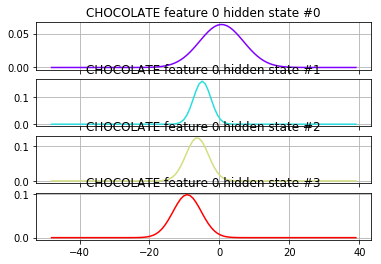

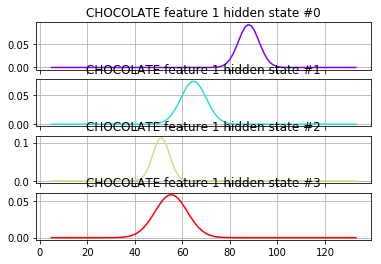

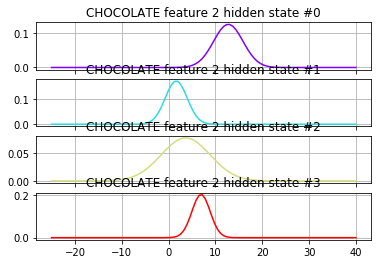

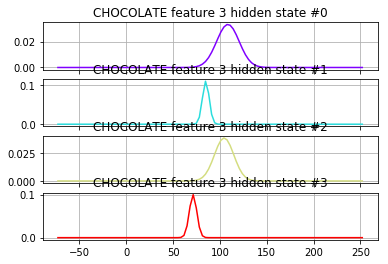

In [20]:
import math
from matplotlib import (cm, pyplot as plt, mlab)

def visualize(word, model):
    """ visualize the input model for a particular word """
    variance=np.array([np.diag(model.covars_[i]) for i in range(model.n_components)])
    figures = []
    for parm_idx in range(len(model.means_[0])):
        xmin = int(min(model.means_[:,parm_idx]) - max(variance[:,parm_idx]))
        xmax = int(max(model.means_[:,parm_idx]) + max(variance[:,parm_idx]))
        fig, axs = plt.subplots(model.n_components, sharex=True, sharey=False)
        colours = cm.rainbow(np.linspace(0, 1, model.n_components))
        for i, (ax, colour) in enumerate(zip(axs, colours)):
            x = np.linspace(xmin, xmax, 100)
            mu = model.means_[i,parm_idx]
            sigma = math.sqrt(np.diag(model.covars_[i])[parm_idx])
            ax.plot(x, mlab.normpdf(x, mu, sigma), c=colour)
            ax.set_title("{} feature {} hidden state #{}".format(word, parm_idx, i))

            ax.grid(True)
        figures.append(plt)
    for p in figures:
        p.show()
        
visualize(my_testword, model)

#####  ModelSelector class
Review the `ModelSelector` class from the codebase found in the `my_model_selectors.py` module.  It is designed to be a strategy pattern for choosing different model selectors.  For the project submission in this section, subclass `SelectorModel` to implement the following model selectors.  In other words, you will write your own classes/functions in the `my_model_selectors.py` module and run them from this notebook:

- `SelectorCV `:  Log likelihood with CV
- `SelectorBIC`: BIC 
- `SelectorDIC`: DIC

You will train each word in the training set with a range of values for the number of hidden states, and then score these alternatives with the model selector, choosing the "best" according to each strategy. The simple case of training with a constant value for `n_components` can be called using the provided `SelectorConstant` subclass as follow:

In [21]:
from my_model_selectors import SelectorConstant

training = asl.build_training(features_ground)  # Experiment here with different feature sets defined in part 1
word = 'VEGETABLE' # Experiment here with different words
model = SelectorConstant(training.get_all_sequences(), training.get_all_Xlengths(), word, n_constant=3).select()
print("Number of states trained in model for {} is {}".format(word, model.n_components))

Number of states trained in model for VEGETABLE is 3


##### Cross-validation folds
If we simply score the model with the Log Likelihood calculated from the feature sequences it has been trained on, we should expect that more complex models will have higher likelihoods. However, that doesn't tell us which would have a better likelihood score on unseen data.  The model will likely be overfit as complexity is added.  To estimate which topology model is better using only the training data, we can compare scores using cross-validation.  One technique for cross-validation is to break the training set into "folds" and rotate which fold is left out of training.  The "left out" fold scored.  This gives us a proxy method of finding the best model to use on "unseen data". In the following example, a set of word sequences is broken into three folds using the [scikit-learn Kfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) class object. When you implement `SelectorCV`, you will use this technique.

In [22]:
from sklearn.model_selection import KFold

training = asl.build_training(features_ground) # Experiment here with different feature sets
word = 'VEGETABLE' # Experiment here with different words
word_sequences = training.get_word_sequences(word)
split_method = KFold()
for cv_train_idx, cv_test_idx in split_method.split(word_sequences):
    print("Train fold indices:{} Test fold indices:{}".format(cv_train_idx, cv_test_idx))  # view indices of the folds

Train fold indices:[2 3 4 5] Test fold indices:[0 1]
Train fold indices:[0 1 4 5] Test fold indices:[2 3]
Train fold indices:[0 1 2 3] Test fold indices:[4 5]


**Tip:** In order to run `hmmlearn` training using the X,lengths tuples on the new folds, subsets must be combined based on the indices given for the folds.  A helper utility has been provided in the `asl_utils` module named `combine_sequences` for this purpose.

##### Scoring models with other criterion
Scoring model topologies with **BIC** balances fit and complexity within the training set for each word.  In the BIC equation, a penalty term penalizes complexity to avoid overfitting, so that it is not necessary to also use cross-validation in the selection process.  There are a number of references on the internet for this criterion.  These [slides](http://www2.imm.dtu.dk/courses/02433/doc/ch6_slides.pdf) include a formula you may find helpful for your implementation.

The advantages of scoring model topologies with **DIC** over BIC are presented by Alain Biem in this [reference](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.58.6208&rep=rep1&type=pdf) (also found [here](https://pdfs.semanticscholar.org/ed3d/7c4a5f607201f3848d4c02dd9ba17c791fc2.pdf)).  DIC scores the discriminant ability of a training set for one word against competing words.  Instead of a penalty term for complexity, it provides a penalty if model liklihoods for non-matching words are too similar to model likelihoods for the correct word in the word set.

<a id='part2_submission'></a>
### Model Selection Implementation Submission
Implement `SelectorCV`, `SelectorBIC`, and `SelectorDIC` classes in the `my_model_selectors.py` module.  Run the selectors on the following five words. Then answer the questions about your results.

**Tip:** The `hmmlearn` library may not be able to train or score all models.  Implement try/except contructs as necessary to eliminate non-viable models from consideration.

In [23]:
words_to_train = ['FISH', 'BOOK', 'VEGETABLE', 'FUTURE', 'JOHN']
import timeit

In [24]:
# autoreload for automatically reloading changes made in my_model_selectors and my_recognizer
%load_ext autoreload
%autoreload 2

In [25]:
# TODO: Implement SelectorCV in my_model_selector.py
from my_model_selectors import SelectorCV

training = asl.build_training(features_ground)  # Experiment here with different feature sets defined in part 1
sequences = training.get_all_sequences()
Xlengths = training.get_all_Xlengths()
for word in words_to_train:
    start = timeit.default_timer()
    model = SelectorCV(sequences, Xlengths, word, 
                    min_n_components=2, max_n_components=15, random_state = 14).select()
    end = timeit.default_timer()-start
    if model is not None:
        print("Training complete for {} with {} states with time {} seconds".format(word, model.n_components, end))
    else:
        print("Training failed for {}".format(word))

Training complete for FISH with 11 states with time 0.7133473556373094 seconds
Training complete for BOOK with 6 states with time 4.748780520230981 seconds
Training complete for VEGETABLE with 2 states with time 1.9574498410973877 seconds
Training complete for FUTURE with 2 states with time 4.737590709290925 seconds
Training complete for JOHN with 12 states with time 46.086455449915924 seconds


In [26]:
# TODO: Implement SelectorBIC in module my_model_selectors.py
from my_model_selectors import SelectorBIC

training = asl.build_training(features_ground)  # Experiment here with different feature sets defined in part 1
sequences = training.get_all_sequences()
Xlengths = training.get_all_Xlengths()
for word in words_to_train:
    start = timeit.default_timer()
    model = SelectorBIC(sequences, Xlengths, word, 
                    min_n_components=2, max_n_components=15, random_state = 14).select()
    end = timeit.default_timer()-start
    if model is not None:
        print("Training complete for {} with {} states with time {} seconds".format(word, model.n_components, end))
    else:
        print("Training failed for {}".format(word))

Training complete for FISH with 5 states with time 0.3331420545138428 seconds
Training complete for BOOK with 8 states with time 1.6158455538959515 seconds
Training complete for VEGETABLE with 9 states with time 0.6009675451579284 seconds
Training complete for FUTURE with 9 states with time 1.7268430245015196 seconds
Training complete for JOHN with 13 states with time 16.104768129568313 seconds


In [27]:
# TODO: Implement SelectorDIC in module my_model_selectors.py
from my_model_selectors import SelectorDIC

training = asl.build_training(features_ground)  # Experiment here with different feature sets defined in part 1
sequences = training.get_all_sequences()
Xlengths = training.get_all_Xlengths()
for word in words_to_train:
    start = timeit.default_timer()
    model = SelectorDIC(sequences, Xlengths, word, 
                    min_n_components=2, max_n_components=15, random_state = 14).select()
    end = timeit.default_timer()-start
    if model is not None:
        print("Training complete for {} with {} states with time {} seconds".format(word, model.n_components, end))
    else:
        print("Training failed for {}".format(word))

Training complete for FISH with 3 states with time 0.7602046889487895 seconds
Training complete for BOOK with 15 states with time 3.274696069189332 seconds
Training complete for VEGETABLE with 15 states with time 2.42038683873929 seconds
Training complete for FUTURE with 15 states with time 3.4050620661637083 seconds
Training complete for JOHN with 15 states with time 17.733870356863832 seconds


**Question 2:**  Compare and contrast the possible advantages and disadvantages of the various model selectors implemented.

**Answer 2:** _1) Cross Validation: While DIC, BIC attempts to penalizing the model complexity, cross validation should be exactly the selector socre on observed data.Therfore, if test data sets are pretty much similar to train data sets, it will provide the most accurate result. However, since it requires running through the data multiple times, over each folds, the expense will reult in a very slow runs. Therefore, it is not suitable with large datasets. CV technique handle the overfitting problem by training on as many folds as are passed in as its hyperparameter. Result: As you can see on the result, the training time is the longest among three techniques. 2) BIC: This model penalizes model complexity. The main advantage of BIC is that it provides simpler models by penalizing models that have high complexity with the penalize parament 'p'. Result: The training time is the fastest with this model. 3) DIC: DIC is calculated by subtracting Loglikelihood of given word and average Loglikelihood for other words data. DIC is rather more complex model than BIC in terms of penalizing, because it calculate the Loglikelidhood of all the words and compare them with given word. Result : The trining time is in between CV and BIC. However, the optimized number of states mostly close to maximum set number. We can expect that this might have risk of overfitting for test set, which can reduce the overall model accuracy._ 

<a id='part2_test'></a>
### Model Selector Unit Testing
Run the following unit tests as a sanity check on the implemented model selectors.  The test simply looks for valid interfaces  but is not exhaustive. However, the project should not be submitted if these tests don't pass.

In [28]:
from asl_test_model_selectors import TestSelectors
suite = unittest.TestLoader().loadTestsFromModule(TestSelectors())
unittest.TextTestRunner().run(suite)

....
----------------------------------------------------------------------
Ran 4 tests in 64.965s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

<a id='part3_tutorial'></a>
## PART 3: Recognizer
The objective of this section is to "put it all together".  Using the four feature sets created and the three model selectors, you will experiment with the models and present your results.  Instead of training only five specific words as in the previous section, train the entire set with a feature set and model selector strategy.  
### Recognizer Tutorial
##### Train the full training set
The following example trains the entire set with the example `features_ground` and `SelectorConstant` features and model selector.  Use this pattern for you experimentation and final submission cells.



In [29]:
from my_model_selectors import SelectorConstant

def train_all_words(features, model_selector):
    training = asl.build_training(features)  # Experiment here with different feature sets defined in part 1
    sequences = training.get_all_sequences()
    Xlengths = training.get_all_Xlengths()
    model_dict = {}
    for word in training.words:
        model = model_selector(sequences, Xlengths, word, 
                        n_constant=3).select()
        model_dict[word]=model
    return model_dict

models = train_all_words(features_ground, SelectorConstant)
print("Number of word models returned = {}".format(len(models)))

Number of word models returned = 112


##### Load the test set
The `build_test` method in `ASLdb` is similar to the `build_training` method already presented, but there are a few differences:
- the object is type `SinglesData` 
- the internal dictionary keys are the index of the test word rather than the word itself
- the getter methods are `get_all_sequences`, `get_all_Xlengths`, `get_item_sequences` and `get_item_Xlengths`

In [30]:
test_set = asl.build_test(features_ground)
print("Number of test set items: {}".format(test_set.num_items))
print("Number of test set sentences: {}".format(len(test_set.sentences_index)))

Number of test set items: 178
Number of test set sentences: 40


<a id='part3_submission'></a>
### Recognizer Implementation Submission
For the final project submission, students must implement a recognizer following guidance in the `my_recognizer.py` module.  Experiment with the four feature sets and the three model selection methods (that's 12 possible combinations). You can add and remove cells for experimentation or run the recognizers locally in some other way during your experiments, but retain the results for your discussion.  For submission, you will provide code cells of **only three** interesting combinations for your discussion (see questions below). At least one of these should produce a word error rate of less than 60%, i.e. WER < 0.60 . 

**Tip:** The hmmlearn library may not be able to train or score all models.  Implement try/except contructs as necessary to eliminate non-viable models from consideration.

In [31]:
from my_recognizer import recognize
from asl_utils import show_errors

In [32]:
#1. Ground, CV

features = features_ground # change as needed
model_selector = SelectorCV # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.5955056179775281
Total correct: 72 out of 178
Video  Recognized                                                    Correct
  100: *FRANK NEW CAR BREAK-DOWN                                     POSS NEW CAR BREAK-DOWN
    2: JOHN *NEW *NEW                                                JOHN WRITE HOMEWORK
   67: JOHN *JOHN NOT *ARRIVE HOUSE                                  JOHN FUTURE NOT BUY HOUSE
    7: JOHN *WHAT GO *HAVE                                           JOHN CAN GO CAN
  201: JOHN *SHOULD *WOMAN *LIKE *ARRIVE HOUSE                       JOHN TELL MARY IX-1P BUY HOUSE
   74: *IX *JANA *MARY *GO                                           JOHN NOT VISIT MARY
  119: *VEGETABLE *LOVE *HAVE *WHAT *SUE                             SUE BUY IX CAR BLUE
   12: *IX *TEACHER *CAN CAN                                         JOHN CAN GO CAN
   77: *JOHN BLAME *LOVE                                             ANN BLAME MARY
  142: JOHN *NEW YESTERDAY *TEACHER BOOK              

In [33]:
#2. Norm, CV

features = features_norm # change as needed
model_selector = SelectorCV # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.6629213483146067
Total correct: 60 out of 178
Video  Recognized                                                    Correct
  100: POSS NEW *HOUSE BREAK-DOWN                                    POSS NEW CAR BREAK-DOWN
    2: JOHN *BUY *ARRIVE                                             JOHN WRITE HOMEWORK
   67: *LIKE FUTURE *JOHN *ARRIVE HOUSE                              JOHN FUTURE NOT BUY HOUSE
    7: JOHN *NEW *MARY *ARRIVE                                       JOHN CAN GO CAN
  201: JOHN *GIVE1 *WOMAN *WOMAN BUY HOUSE                           JOHN TELL MARY IX-1P BUY HOUSE
   74: JOHN *BILL VISIT *LOVE                                        JOHN NOT VISIT MARY
  119: *NOT *BUY1 *SOMETHING-ONE *PEOPLE *SUE                        SUE BUY IX CAR BLUE
   12: *WHAT *WHAT *GO1 CAN                                          JOHN CAN GO CAN
   77: *GO *MARY *LOVE                                               ANN BLAME MARY
  142: JOHN *ARRIVE YESTERDAY WHAT *COAT              

In [34]:
#3. Polar, CV

features = features_polar # change as needed
model_selector = SelectorCV # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.6123595505617978
Total correct: 69 out of 178
Video  Recognized                                                    Correct
  100: POSS NEW CAR BREAK-DOWN                                       POSS NEW CAR BREAK-DOWN
    2: *POSS *BROTHER *NEW                                           JOHN WRITE HOMEWORK
   67: JOHN *JOHN NOT BUY HOUSE                                      JOHN FUTURE NOT BUY HOUSE
    7: JOHN *HAVE GO *WHAT                                           JOHN CAN GO CAN
  201: JOHN *SHOULD *WOMAN *LOVE BUY HOUSE                           JOHN TELL MARY IX-1P BUY HOUSE
   74: *IX *IX *MARY *GO                                             JOHN NOT VISIT MARY
  119: *VEGETABLE *BUY1 *GO *HAVE *GIVE                              SUE BUY IX CAR BLUE
   12: *IX *WHAT *WHAT CAN                                           JOHN CAN GO CAN
   77: *JOHN BLAME *SOMETHING-ONE                                    ANN BLAME MARY
  142: JOHN *NEW YESTERDAY *TEACHER BOOK              

In [35]:
#4. Delta, CV

features = features_delta # change as needed
model_selector = SelectorCV # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.6123595505617978
Total correct: 69 out of 178
Video  Recognized                                                    Correct
  100: *JOHN NEW CAR BREAK-DOWN                                      POSS NEW CAR BREAK-DOWN
    2: JOHN *LOVE *GO1                                               JOHN WRITE HOMEWORK
   67: JOHN *WHO *IX BUY *LOVE                                       JOHN FUTURE NOT BUY HOUSE
    7: JOHN *FINISH GO *TEACHER                                      JOHN CAN GO CAN
  201: JOHN *IX *IX *LIKE BUY HOUSE                                  JOHN TELL MARY IX-1P BUY HOUSE
   74: JOHN *WHO *IX MARY                                            JOHN NOT VISIT MARY
  119: *JOHN *BUY1 *GO CAR *MARY                                     SUE BUY IX CAR BLUE
   12: JOHN CAN *GO1 CAN                                             JOHN CAN GO CAN
   77: *JOHN BLAME MARY                                              ANN BLAME MARY
  142: JOHN BUY YESTERDAY WHAT *MARY                  

In [36]:
#5. Custom, CV

features = features_custom # change as needed
model_selector = SelectorCV # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.6348314606741573
Total correct: 65 out of 178
Video  Recognized                                                    Correct
  100: POSS NEW CAR BREAK-DOWN                                       POSS NEW CAR BREAK-DOWN
    2: *WOMAN *BOOK *NEW                                             JOHN WRITE HOMEWORK
   67: JOHN *GIVE1 *GIVE *ARRIVE HOUSE                               JOHN FUTURE NOT BUY HOUSE
    7: JOHN *BUY *MARY *ARRIVE                                       JOHN CAN GO CAN
  201: JOHN *GIVE1 *GIVE *JOHN BUY HOUSE                             JOHN TELL MARY IX-1P BUY HOUSE
   74: JOHN *VISIT *GIVE *IX                                         JOHN NOT VISIT MARY
  119: *PREFER *BUY1 *SOMETHING-ONE *PEOPLE *VISIT                   SUE BUY IX CAR BLUE
   12: *SHOULD *CAR *HAVE *HOUSE                                     JOHN CAN GO CAN
   77: *GO BLAME *LOVE                                               ANN BLAME MARY
  142: JOHN BUY YESTERDAY WHAT BOOK                   

In [37]:
#6. Ground, BIC

features = features_ground # change as needed
model_selector = SelectorBIC # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.550561797752809
Total correct: 80 out of 178
Video  Recognized                                                    Correct
  100: *IX NEW CAR BREAK-DOWN                                        POSS NEW CAR BREAK-DOWN
    2: JOHN WRITE *NEW                                               JOHN WRITE HOMEWORK
   67: *SHOULD *JOHN *WHO BUY HOUSE                                  JOHN FUTURE NOT BUY HOUSE
    7: *SOMETHING-ONE *GO1 GO *ARRIVE                                JOHN CAN GO CAN
  201: JOHN *MARY *LOVE *JOHN BUY HOUSE                              JOHN TELL MARY IX-1P BUY HOUSE
   74: *IX *VISIT VISIT MARY                                         JOHN NOT VISIT MARY
  119: *VISIT *BUY1 IX *BOX *GO                                      SUE BUY IX CAR BLUE
   12: *IX *WHAT *CAN CAN                                            JOHN CAN GO CAN
   77: *JOHN BLAME *LOVE                                             ANN BLAME MARY
  142: JOHN *STUDENT YESTERDAY WHAT BOOK               

In [38]:
#7. Norm, BIC

features = features_norm # change as needed
model_selector = SelectorBIC # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.6123595505617978
Total correct: 69 out of 178
Video  Recognized                                                    Correct
  100: POSS NEW CAR BREAK-DOWN                                       POSS NEW CAR BREAK-DOWN
    2: JOHN WRITE *ARRIVE                                            JOHN WRITE HOMEWORK
   67: *MARY *IX *JOHN *ARRIVE HOUSE                                 JOHN FUTURE NOT BUY HOUSE
    7: *MARY *NEW GO *WHAT                                           JOHN CAN GO CAN
  201: JOHN *GIVE1 *WOMAN *WOMAN *STUDENT HOUSE                      JOHN TELL MARY IX-1P BUY HOUSE
   74: *IX *BILL VISIT MARY                                          JOHN NOT VISIT MARY
  119: SUE *BUY1 IX CAR *FINISH                                      SUE BUY IX CAR BLUE
   12: *MARY *HAVE *GO1 CAN                                          JOHN CAN GO CAN
   77: *JOHN BLAME MARY                                              ANN BLAME MARY
  142: JOHN BUY YESTERDAY WHAT BOOK                   

In [39]:
#8. Polar, BIC

features = features_polar # change as needed
model_selector = SelectorBIC # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.5449438202247191
Total correct: 81 out of 178
Video  Recognized                                                    Correct
  100: POSS NEW CAR BREAK-DOWN                                       POSS NEW CAR BREAK-DOWN
    2: *GO WRITE *NEW                                                JOHN WRITE HOMEWORK
   67: *SHOULD FUTURE *MARY BUY HOUSE                                JOHN FUTURE NOT BUY HOUSE
    7: JOHN *PEOPLE GO *ARRIVE                                       JOHN CAN GO CAN
  201: JOHN *MAN *MAN *LIKE BUY HOUSE                                JOHN TELL MARY IX-1P BUY HOUSE
   74: *IX *VISIT *GIVE MARY                                         JOHN NOT VISIT MARY
  119: *PREFER *BUY1 *CAR CAR *GO                                    SUE BUY IX CAR BLUE
   12: JOHN *WHAT *GO1 CAN                                           JOHN CAN GO CAN
   77: *JOHN BLAME *LOVE                                             ANN BLAME MARY
  142: JOHN BUY YESTERDAY WHAT BOOK                   

In [40]:
#9. Delta, BIC

features = features_delta # change as needed
model_selector = SelectorBIC # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.6179775280898876
Total correct: 68 out of 178
Video  Recognized                                                    Correct
  100: *JOHN NEW CAR BREAK-DOWN                                      POSS NEW CAR BREAK-DOWN
    2: JOHN *LOVE HOMEWORK                                           JOHN WRITE HOMEWORK
   67: JOHN *JOHN *MARY BUY HOUSE                                    JOHN FUTURE NOT BUY HOUSE
    7: JOHN *STUDENT *GIVE1 *STUDENT                                 JOHN CAN GO CAN
  201: JOHN *IX MARY *IX BUY HOUSE                                   JOHN TELL MARY IX-1P BUY HOUSE
   74: JOHN *JOHN *IX MARY                                           JOHN NOT VISIT MARY
  119: *JOHN *BUY1 IX CAR *MARY                                      SUE BUY IX CAR BLUE
   12: JOHN CAN *GO1 CAN                                             JOHN CAN GO CAN
   77: *JOHN *CAR MARY                                               ANN BLAME MARY
  142: JOHN BUY *FUTURE WHAT *MARY                    

In [41]:
#10. Custom, BIC

features = features_custom # change as needed
model_selector = SelectorBIC # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.5955056179775281
Total correct: 72 out of 178
Video  Recognized                                                    Correct
  100: *IX NEW CAR BREAK-DOWN                                        POSS NEW CAR BREAK-DOWN
    2: *WOMAN WRITE *GIVE1                                           JOHN WRITE HOMEWORK
   67: JOHN *IX *JOHN BUY HOUSE                                      JOHN FUTURE NOT BUY HOUSE
    7: *SOMETHING-ONE *BUY GO CAN                                    JOHN CAN GO CAN
  201: JOHN *MAN *WOMAN *WOMAN *STUDENT HOUSE                        JOHN TELL MARY IX-1P BUY HOUSE
   74: JOHN *JOHN *GIVE *LOVE                                        JOHN NOT VISIT MARY
  119: *PREFER *BUY1 IX CAR *GO                                      SUE BUY IX CAR BLUE
   12: JOHN *HAVE *NEW *HOUSE                                        JOHN CAN GO CAN
   77: *JOHN BLAME MARY                                              ANN BLAME MARY
  142: JOHN *HAVE YESTERDAY WHAT BOOK                 

In [42]:
#11. Ground, DIC

features = features_ground # change as needed
model_selector = SelectorDIC # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.5730337078651685
Total correct: 76 out of 178
Video  Recognized                                                    Correct
  100: *IX NEW CAR *ARRIVE                                           POSS NEW CAR BREAK-DOWN
    2: JOHN *NEW *GIVE1                                              JOHN WRITE HOMEWORK
   67: JOHN FUTURE *MARY BUY HOUSE                                   JOHN FUTURE NOT BUY HOUSE
    7: *SOMETHING-ONE *CAR *ARRIVE *ARRIVE                           JOHN CAN GO CAN
  201: JOHN *MARY *LOVE *JOHN *GIVE1 HOUSE                           JOHN TELL MARY IX-1P BUY HOUSE
   74: *IX *GO *MARY MARY                                            JOHN NOT VISIT MARY
  119: *VISIT *BUY1 IX *BOX *IX                                      SUE BUY IX CAR BLUE
   12: *IX *WHAT *WHAT *CAR                                          JOHN CAN GO CAN
   77: *JOHN BLAME *LOVE                                             ANN BLAME MARY
  142: JOHN BUY YESTERDAY WHAT BOOK                   

In [43]:
#12. Norm, DIC

features = features_norm # change as needed
model_selector = SelectorDIC # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.5955056179775281
Total correct: 72 out of 178
Video  Recognized                                                    Correct
  100: POSS NEW CAR BREAK-DOWN                                       POSS NEW CAR BREAK-DOWN
    2: JOHN WRITE *ARRIVE                                            JOHN WRITE HOMEWORK
   67: *MARY *IX *JOHN *ARRIVE HOUSE                                 JOHN FUTURE NOT BUY HOUSE
    7: *MARY *CAR GO CAN                                             JOHN CAN GO CAN
  201: JOHN *GIVE1 *IX *WOMAN *ARRIVE HOUSE                          JOHN TELL MARY IX-1P BUY HOUSE
   74: *GO *VISIT VISIT MARY                                         JOHN NOT VISIT MARY
  119: SUE *BUY1 IX *JOHN *GO                                        SUE BUY IX CAR BLUE
   12: JOHN *WHAT *ARRIVE CAN                                        JOHN CAN GO CAN
   77: ANN BLAME MARY                                                ANN BLAME MARY
  142: JOHN BUY YESTERDAY WHAT BOOK                   

In [44]:
#13. Polar, DIC

features = features_polar # change as needed
model_selector = SelectorDIC # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.5449438202247191
Total correct: 81 out of 178
Video  Recognized                                                    Correct
  100: POSS NEW CAR BREAK-DOWN                                       POSS NEW CAR BREAK-DOWN
    2: JOHN *NEW *GIVE1                                              JOHN WRITE HOMEWORK
   67: *SHOULD FUTURE *MARY BUY HOUSE                                JOHN FUTURE NOT BUY HOUSE
    7: JOHN CAN GO CAN                                               JOHN CAN GO CAN
  201: JOHN *MAN *LOVE *JOHN BUY HOUSE                               JOHN TELL MARY IX-1P BUY HOUSE
   74: *IX *GO *GO *VISIT                                            JOHN NOT VISIT MARY
  119: *MARY *BUY1 IX *BLAME *IX                                     SUE BUY IX CAR BLUE
   12: JOHN *WHAT *JOHN CAN                                          JOHN CAN GO CAN
   77: *JOHN *GIVE1 MARY                                             ANN BLAME MARY
  142: JOHN BUY YESTERDAY WHAT BOOK                   

In [45]:
#14. Delta, DIC

features = features_delta # change as needed
model_selector = SelectorDIC # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.6292134831460674
Total correct: 66 out of 178
Video  Recognized                                                    Correct
  100: *JOHN *ARRIVE CAR *HOUSE                                      POSS NEW CAR BREAK-DOWN
    2: JOHN *GIVE1 *ARRIVE                                           JOHN WRITE HOMEWORK
   67: JOHN *JOHN *MARY BUY HOUSE                                    JOHN FUTURE NOT BUY HOUSE
    7: JOHN *GIVE1 *GIVE1 *ARRIVE                                    JOHN CAN GO CAN
  201: JOHN *IX *IX *JOHN BUY HOUSE                                  JOHN TELL MARY IX-1P BUY HOUSE
   74: JOHN *JOHN *IX MARY                                           JOHN NOT VISIT MARY
  119: *JOHN *GIVE1 IX CAR *MARY                                     SUE BUY IX CAR BLUE
   12: JOHN *BOX *JOHN CAN                                           JOHN CAN GO CAN
   77: *JOHN *ARRIVE MARY                                            ANN BLAME MARY
  142: JOHN BUY *FUTURE WHAT *WHAT                    

In [46]:
#15. Custom, DIC

features = features_custom # change as needed
model_selector = SelectorDIC # change as needed

# TODO Recognize the test set and display the result with the show_errors method
models = train_all_words(features, model_selector)
test_set = asl.build_test(features)
probabilities, guesses = recognize(models, test_set)
show_errors(guesses, test_set)


**** WER = 0.5730337078651685
Total correct: 76 out of 178
Video  Recognized                                                    Correct
  100: POSS NEW CAR BREAK-DOWN                                       POSS NEW CAR BREAK-DOWN
    2: JOHN WRITE *ARRIVE                                            JOHN WRITE HOMEWORK
   67: JOHN FUTURE *JOHN BUY HOUSE                                   JOHN FUTURE NOT BUY HOUSE
    7: *SOMETHING-ONE *NEW GO CAN                                    JOHN CAN GO CAN
  201: JOHN *MAN *IX *JOHN BUY HOUSE                                 JOHN TELL MARY IX-1P BUY HOUSE
   74: *IX *JOHN *JOHN *LOVE                                         JOHN NOT VISIT MARY
  119: *PREFER *LOVE IX CAR *GO                                      SUE BUY IX CAR BLUE
   12: JOHN *CAR *WHAT *HOUSE                                        JOHN CAN GO CAN
   77: *JOHN BLAME MARY                                              ANN BLAME MARY
  142: JOHN BUY YESTERDAY WHAT BOOK                   

**Question 3:**  Summarize the error results from three combinations of features and model selectors.  What was the "best" combination and why?  What additional information might we use to improve our WER?  For more insight on improving WER, take a look at the introduction to Part 4.

**Answer 3:**
_1) Total Result (WER):_

|      |CV    |BIC      |DIC      |
|:---: |:---: |:------: |:-------:|
|Ground|59.6% |__55.0%__|57.3%    |
|Norm  |66.3% |61.2%    |59.6%    |
|Polar |61.2% |__54.5%__|__54.4%__|
|Delta |61.2% |61.8%    |62.9%    |
|Custom|63.5% |59.6%    |57.3%    |

_2) The performance analysis: 
As we saw at the section2, the fastest model to test on was also BIC model. In addition, the overall accuracy of BIC was also the best among three models. In terms of features, polar shows the best accuracy result. Top 3 performance combination were (1) DIC with Polar features (54.4% WER), (2) BIC with Polar features (54.5% WER) and (3) BIC with Ground features (55.0% WER). First of all, polar coordinate features was able to more efficiently differenciate words than ground coordinate features. I think that using angle and distance might be differenciate the hand location than x,y coordinate because the variation between angle and distance is larger than that of x,y coordinate. Therefore, the "nomalized polar(custom)" could not help to reduce the WER because normalization might reduce the variation among data. BIC might prevent the overfitting effectively by penalizing the model complexity, and it might show the best accuracy in test sets. Obviously, like NLP processing, understanding the relationship between words in sentence is the most important in order to improve the accruacy. Therefore, we can enhance the performance with SLM data using 1,2,3-gram statistics as Part4 suggested. I will try it soon, and compare the result with this section!!_

<a id='part3_test'></a>
### Recognizer Unit Tests
Run the following unit tests as a sanity check on the defined recognizer.  The test simply looks for some valid values but is not exhaustive. However, the project should not be submitted if these tests don't pass.

In [47]:
from asl_test_recognizer import TestRecognize
suite = unittest.TestLoader().loadTestsFromModule(TestRecognize())
unittest.TextTestRunner().run(suite)

..
----------------------------------------------------------------------
Ran 2 tests in 34.947s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

<a id='part4_info'></a>
## PART 4: (OPTIONAL)  Improve the WER with Language Models
We've squeezed just about as much as we can out of the model and still only get about 50% of the words right! Surely we can do better than that.  Probability to the rescue again in the form of [statistical language models (SLM)](https://en.wikipedia.org/wiki/Language_model).  The basic idea is that each word has some probability of occurrence within the set, and some probability that it is adjacent to specific other words. We can use that additional information to make better choices.

##### Additional reading and resources
- [Introduction to N-grams (Stanford Jurafsky slides)](https://web.stanford.edu/class/cs124/lec/languagemodeling.pdf)
- [Speech Recognition Techniques for a Sign Language Recognition System, Philippe Dreuw et al](https://www-i6.informatik.rwth-aachen.de/publications/download/154/Dreuw--2007.pdf) see the improved results of applying LM on *this* data!
- [SLM data for *this* ASL dataset](ftp://wasserstoff.informatik.rwth-aachen.de/pub/rwth-boston-104/lm/)

##### Optional challenge
The recognizer you implemented in Part 3 is equivalent to a "0-gram" SLM.  Improve the WER with the SLM data provided with the data set in the link above using "1-gram", "2-gram", and/or "3-gram" statistics. The `probabilities` data you've already calculated will be useful and can be turned into a pandas DataFrame if desired (see next cell).  
Good luck!  Share your results with the class!

In [48]:
# create a DataFrame of log likelihoods for the test word items
df_probs = pd.DataFrame(data=probabilities)
df_probs.head()

,ALL,ANN,APPLE,ARRIVE,BILL,BLAME,BLUE,BOOK,BORROW,BOX,...,VIDEOTAPE,VISIT,WANT,WHAT,WHO,WILL,WOMAN,WONT,WRITE,YESTERDAY
0,-2675.209398,-497.254718,-788.776237,-289.303482,-969.062612,-410.007320,-1908.333450,-1047.872355,-5721.399377,-653.722533,...,-2829.335112,-97.371090,-2366.784591,-453.167685,-228.602411,-812.602993,-243.676120,-783.770789,-712.156840,-198.807214
1,-10525.090698,-4195.046166,-3638.974677,-67.401584,-8119.051399,-115.481271,-2687.089165,-135.860818,-886.466116,-186.957993,...,-75.183416,-55.336137,-2532.110187,-314.815094,-261.265917,-5981.727601,-354.475500,-1740.411072,5.719841,-511.896412
2,-12065.597518,-4564.173301,-4593.505451,-225.272598,-10071.226786,-549.243823,-4041.232946,-1096.658858,-4081.683229,-378.089636,...,-1040.060762,-447.135275,-4061.759660,-672.778988,-1270.757225,-6133.857269,-1301.592018,-2188.720958,-1702.562744,-913.430626
3,-2675.869951,-649.812201,-717.818519,-197.977229,-640.835194,-300.711129,-690.673066,-1077.766455,-7997.288670,-733.393894,...,-3738.948090,-140.105891,-2210.538936,-185.878610,-143.480696,-614.465191,-178.462121,-209.453403,-1097.834029,-379.175992
4,-2995.815454,-1758.057578,-875.792158,-29.403596,-3850.635430,-38.220707,-901.516587,-86.101159,-1053.335573,-22.273945,...,-121.359543,-24.572886,-298.780351,-39.912400,-231.387710,-3345.369253,-203.383001,-732.672369,-125.412755,-146.418574
